# The transformer model for sequence prediction

Deep learning is all about *learning* useful *functions* from big *datasets*. These useful functions are called nevral networks, and are put together from smaller functions with parameters that are decided through optimization. In opposition to conventional programming, where we tell the computer what to do, nevral networks learns from observational data and figure out its own solution to the given problem. Here we will implement the transformer model, one of the main components in big languagemodels like *ChatGPT*.

## **1.0** Structure of the datasets and the transformermodel

**(1)** Let          $a = 15$, $b = 7$, $c = 47$, $d = 152$

then we have   $[1, 5, 7, 4, 7, 1, 5]$, $y =[1, 5, 2]$


**(2)** Let   

$x^{(0)} = [1, 5, 7, 4, 7]$

$x^{(1)} = [1, 5, 7, 4, 7, \hat{z_4}]$

$x^{(2)} = [1, 5, 7, 4, 7, \hat{z_4}, \hat{z_5}]$

$x^{(3)} = [1, 5, 7, 4, 7, \hat{z_4}, \hat{z_5}, \hat{z_6}]$

$f_{\theta}(x^{(0)}) = [\hat{z_0^{(0)}}, \hat{z_1^{(0)}}, \hat{z_2^{(0)}}, \hat{z_3^{(0)}}, \hat{z_4^{(0)}}]$

$f_{\theta}(x^{(0)}) = [\hat{z_0^{(1)}}, \hat{z_1^{(1)}}, \hat{z_2^{(1)}}, \hat{z_3^{(1)}}, \hat{z_4^{(1)}}, \hat{z_5^{(1)}}]$

$f_{\theta}(x^{(0)}) = [\hat{z_0^{(2)}}, \hat{z_1^{(2)}}, \hat{z_2^{(2)}}, \hat{z_3^{(2)}}, \hat{z_4^{(2)}}, \hat{z_5^{(2)}}, \hat{z_6^{(2)}}]$

If the optimization is good, the result should be:

$\hat{z_4^{(0)}} = 1, \hat{z_5^{(1)}} = 5$ og $\hat{z_6^{(2)}} = 2$

**(3)**

For the object function to be $\mathcal{L}(\theta, \mathcal{D}) = 0$, the probability distribution must be given by:

$\hat{Y} = onehot(y) = \begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
1 & 0 & 0 & 0 \\
\end{bmatrix}$

In this case $\hat{y}$ will be given by:

$\hat{y} := argmax(\hat{Y}) = y$

Then, $\mathcal(L) = 0$ will be fulfilled.

**(4)**

The number of parameters is given by:

$d(2m + n_{max} + L(4k + 2p))$

**(5)**

$X = onehot(x) = \begin{bmatrix}
0 \\
1
\end{bmatrix}, z_0 = W_Ex + [W_P]_{0:n} = \begin{bmatrix}
1 & 0 \\
0 & \alpha
\end{bmatrix} \begin{bmatrix}
0 \\
1
\end{bmatrix} + \begin{bmatrix}
1 \\
0
\end{bmatrix} = \begin{bmatrix}
0 \\
\alpha
\end{bmatrix} + \begin{bmatrix}
1 \\
0
\end{bmatrix} = \begin{bmatrix}
1 \\
\alpha
\end{bmatrix}$

$Z = softmax(\begin{bmatrix}
1
\alpha
\end{bmatrix}) = \begin{bmatrix}
\frac{e^1}{e^1+1^{\alpha}} \\
\frac{e^{\alpha}}{e^1+e^{\alpha}}
\end{bmatrix}$

$\hat{z} = 1 \Rightarrow \alpha > 1$ (when $\alpha=1$, undefined)


## **2.0** Implementing the transformermodel

**(1)** 

1) If the type of layer is identified as `LinearLayer` or `Attention`, `NeuralNetwork` will inherit `step_gd` from the `Layer` class. 

2) If the type of layer is identified as `EmbedPosition`, `NeuralNetwork` will inherit `step_gd` from the `EmbedPosition` class. 

3) If the type of layer is identified as `FeedForward`, `NeuralNetwork` will inherit `step_gd` from the `FeedForward` class.


In [1]:
from neural_network import *
from layers import *
from training import trainModel
import numpy as np
from data_generators import get_train_test_addition, get_train_test_sorting
from training import *
import pickle


In [2]:
r = 5
m = 2
batchSize = 250
batches = 10
d = 10
k = 5
p = 15
L = 2
n_max = 2*r-1
sigma = Relu

data = get_train_test_sorting(r,m,batchSize, batches)


In [3]:
embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
att2 = Attention(d,k)
ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

att_ffd_list = []
for layer in range(L):
    att = Attention(d,k)
    ff = FeedForward(d,p)
    att_ffd_list.append(att)
    att_ffd_list.append(ff)

layers = [embed] + att_ffd_list + [un_embed] + [softmax]
nn = NeuralNetwork(layers)

In [4]:
losses = trainModel(nn,data,100,loss, m, r, 0.001)
losses.shape

Iterasjon  0  L =  0.6836031011071302  gradient =  0.030811637502761467
Iterasjon  1  L =  0.6609392387805296  gradient =  0.03016372040119741
Iterasjon  2  L =  0.6368598561805274  gradient =  0.02949538104620711
Iterasjon  3  L =  0.6091394895767538  gradient =  0.02880880813777376
Iterasjon  4  L =  0.5772968175454415  gradient =  0.028140065803586637
Iterasjon  5  L =  0.5412011418684349  gradient =  0.02758456224907873
Iterasjon  6  L =  0.5019614738735344  gradient =  0.027320877285910893
Iterasjon  7  L =  0.46263247728038176  gradient =  0.027592088589963728
Iterasjon  8  L =  0.4267740142847086  gradient =  0.02856477238786068
Iterasjon  9  L =  0.3967322765785524  gradient =  0.030128513038069096
Iterasjon  10  L =  0.37287381122026464  gradient =  0.03167075217707321
Iterasjon  11  L =  0.35432117898949966  gradient =  0.032636547722656215
Iterasjon  12  L =  0.3400131398182541  gradient =  0.033002396000049616
Iterasjon  13  L =  0.3289921518003286  gradient =  0.0330182772

(100,)

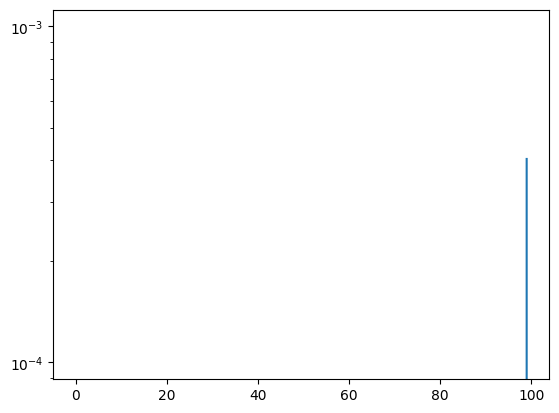

In [5]:
import matplotlib.pyplot as plt
len(losses)
plt.semilogy([i for i in range(len(losses))], losses)

In [6]:

# DO NOT RUN IF NOT NEW TRAINED MODEL
# with open("sortingTrained_v1", 'wb') as f:
    # pickle.dump(nn, f)

In [7]:
#with open("savedObject", 'rb') as f:
     #nn2 = pickle.load(f)

#type(nn2)

In [8]:
# with open("sortingTrained_v1", "rb") as f:
#     nn = pickle.load(f)

y_pred = predict(nn, data['x_test'], r, m)

0
(250, 5)
(250, 5)
(250, 1)
1
(250, 6)
(250, 6)
(250, 1)
2
(250, 7)
(250, 7)
(250, 1)
3
(250, 8)
(250, 8)
(250, 1)
4
(250, 9)
(250, 9)
(250, 1)


In [9]:
print(y_pred)
print()
print(data['y_test'])
np.count_nonzero(np.count_nonzero(y_pred == data['y_test'], axis=2) == y_pred.shape[-1])


[[[0. 0. 1. 1. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 1.]
  ...
  [0. 0. 0. 1. 1.]
  [0. 0. 0. 1. 1.]
  [0. 0. 1. 1. 1.]]]

[[[0. 0. 1. 1. 1.]
  [0. 0. 0. 0. 1.]
  [0. 0. 0. 1. 1.]
  ...
  [0. 0. 0. 1. 1.]
  [0. 0. 0. 1. 1.]
  [0. 0. 1. 1. 1.]]]


250

In [10]:
r = 7
m = 5
batchSize = 250
batches = 10
iterations = 100
d = 20
k = 10
p = 25
L = 2
n_max = 2*r-1
sigma = Relu

In [11]:
data = get_train_test_sorting(r,m,batchSize, batches)

In [12]:
embed = EmbedPosition(n_max,m,d)
att1 = Attention(d,k)
att2 = Attention(d,k)

ff1 = FeedForward(d,p)
ff2 = FeedForward(d,p)

un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

nn = NeuralNetwork([embed,att1,ff1,att2, ff2, un_embed,softmax])

In [13]:
losses = trainModel(nn,data, iterations, loss, m, r)

Iterasjon  0  L =  1.3180256645356145  gradient =  1.3605222554664682
Iterasjon  1  L =  0.8029755259139074  gradient =  0.06154618129138519
Iterasjon  2  L =  0.667250975058661  gradient =  0.04949780787098209
Iterasjon  3  L =  0.5072564028433587  gradient =  0.04171710821499383
Iterasjon  4  L =  0.33895783953587555  gradient =  0.03706066356420531
Iterasjon  5  L =  0.22619707285197427  gradient =  0.026535261543089276
Iterasjon  6  L =  0.1518116783863584  gradient =  0.01877311459919807
Iterasjon  7  L =  0.10090941903367305  gradient =  0.020665271450939694
Iterasjon  8  L =  0.06117139354637643  gradient =  0.017002306628716556
Iterasjon  9  L =  0.0415024979300117  gradient =  0.01417552459519387
Iterasjon  10  L =  0.026955114252082867  gradient =  0.013496925384970307
Iterasjon  11  L =  0.017882066274081305  gradient =  0.013422863177501812
Iterasjon  12  L =  0.013592010588700049  gradient =  0.013184414916341057
Iterasjon  13  L =  0.00959545858703111  gradient =  0.01303

In [14]:
y_pred = predict(nn, data['x_test'], r, m)
np.count_nonzero(np.count_nonzero(y_pred == data['y_test'], axis=2) == y_pred.shape[-1])

0
(250, 7)
(250, 7)
(250, 1)
1
(250, 8)
(250, 8)
(250, 1)
2
(250, 9)
(250, 9)
(250, 1)
3
(250, 10)
(250, 10)
(250, 1)
4
(250, 11)
(250, 11)
(250, 1)
5
(250, 12)
(250, 12)
(250, 1)
6
(250, 13)
(250, 13)
(250, 1)


250

In [15]:
batch_size = 250
batches = 20
d = 30
k=20
p=40
L=3
m=10
n_max = 2*2 + 3

data =get_train_test_addition(2,batch_size,20)


In [16]:
layers = []

embed = EmbedPosition(n_max,m,d)
layers.append(embed)
for i in range(L):
    att1 = Attention(d,k)
    ff1 = FeedForward(d,p)

    layers.append(att1)
    layers.append(ff1)


un_embed = LinearLayer(d,m)
layers.append(un_embed)
softmax = Softmax()
layers.append(softmax)

nn = NeuralNetwork(layers)

In [23]:
losses = trainModel(nn,data, 150, loss, m, 3) #her kjem da dimensjonsfeil må sjekkes ut

ValueError: operands could not be broadcast together with shapes (30,7) (30,6) 

In [ ]:
# DO NOT RUN IF NOT NEW TRAINED MODEL
# with open("sortingTrained_v2", 'wb') as f:
    # pickle.dump(nn, f)